## GlADE+ catalog visualization

In this notebook, we use the `healpy` library to visualize the data output from the `parse_catalog` script. We follow the tutorial provided in the [`healpy` documentation](https://healpy.readthedocs.io/en/latest/tutorial.html).

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp
import h5py

In [55]:
# Constants
nside = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        nside, hp.nside2resol(nside, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [68]:
filename = "GLADE+reduced.txt"
%run -i -t parse_catalog.py {filename}  -v --nrows 1000000 --nside {nside}

Starting catalog parsing...
Reader chunk size: 100000
Parsing the first 1000000 galaxies


Parsed chunk number 10
Parsed catalog has 796256 rows
203744 rows filtered out
79.6% rows included
-------------------------------------------
Creating output datasets...
Done!

IPython CPU timings (estimated):
  User   :       5.59 s.
  System :       1.10 s.
Wall time:       7.35 s.


Number of pixels in the map:

In [57]:
npix = hp.nside2npix(nside)
npix

12288

Importing file:

In [58]:
f = h5py.File('output.hdf5', 'r')
list(f.keys())

['dec', 'ra', 'skymap', 'z']

<HDF5 dataset "skymap": shape (796256,), type "<i8">


[  0.   0.   0. ... 103.  88.  66.]


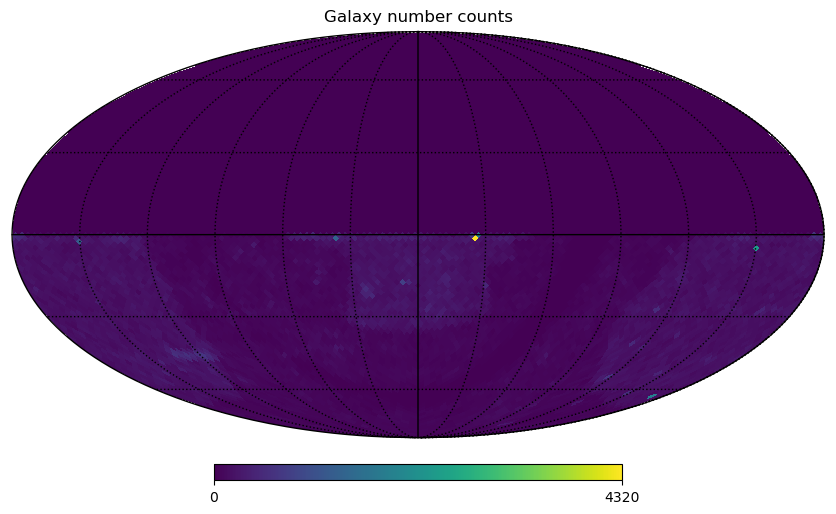

In [59]:
skymap_indices = f['skymap']
print(skymap_indices)
nonempty_pixels, counts = np.unique(skymap_indices, return_counts=True)
skymap = np.zeros(npix)
for pixel, count in zip(nonempty_pixels, counts):
    skymap[pixel] = count
print(skymap)
hp.mollview(skymap, title="Galaxy number counts")
hp.graticule()